In [24]:
import pandas as pd
import numpy as np

#load data from csv file 
tracks=pd.read_csv('tracks.csv')

print(tracks.head())
print(tracks.columns)
print(tracks.info())
print(tracks.describe())

             track_id             name           artist  \
0  TRIOREW128F424EAF0   Mr. Brightside      The Killers   
1  TRRIVDJ128F429B0E8       Wonderwall            Oasis   
2  TROUVHL128F426C441  Come as You Are          Nirvana   
3  TRUEIND128F93038C4      Take Me Out  Franz Ferdinand   
4  TRLNZBD128F935E4D8            Creep        Radiohead   

                                 spotify_preview_url              spotify_id  \
0  https://p.scdn.co/mp3-preview/4d26180e6961fd46...  09ZQ5TmUG8TSL56n0knqrj   
1  https://p.scdn.co/mp3-preview/d012e536916c927b...  06UfBBDISthj1ZJAtX4xjj   
2  https://p.scdn.co/mp3-preview/a1c11bb1cb231031...  0keNu0t0tqsWtExGM3nT1D   
3  https://p.scdn.co/mp3-preview/399c401370438be4...  0ancVQ9wEcHVd0RrGICTE4   
4  https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...  01QoK9DA7VTeTSE3MNzp4I   

                                                tags genre  year  duration_ms  \
0  rock, alternative, indie, alternative_rock, in...   NaN  2004       222200   
1 

In [25]:
selected_features=['track_id', 'name', 'artist','tags', 'danceability', 'energy', 'tempo']
df_selected=tracks[selected_features]

print(df_selected.head())
print(df_selected.info())
print(df_selected.describe())

             track_id             name           artist  \
0  TRIOREW128F424EAF0   Mr. Brightside      The Killers   
1  TRRIVDJ128F429B0E8       Wonderwall            Oasis   
2  TROUVHL128F426C441  Come as You Are          Nirvana   
3  TRUEIND128F93038C4      Take Me Out  Franz Ferdinand   
4  TRLNZBD128F935E4D8            Creep        Radiohead   

                                                tags  danceability  energy  \
0  rock, alternative, indie, alternative_rock, in...         0.355   0.918   
1  rock, alternative, indie, pop, alternative_roc...         0.409   0.892   
2   rock, alternative, alternative_rock, 90s, grunge         0.508   0.826   
3  rock, alternative, indie, alternative_rock, in...         0.279   0.664   
4  rock, alternative, indie, alternative_rock, in...         0.515   0.430   

     tempo  
0  148.114  
1  174.426  
2  120.012  
3  104.560  
4   91.841  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 7 

In [26]:
missing_values=df_selected.isnull().sum()
print(missing_values)

#drop rows with missing values
df_selected=df_selected.dropna()

track_id           0
name               0
artist             0
tags            1127
danceability       0
energy             0
tempo              0
dtype: int64


In [27]:
#check for duplicates
duplicates=df_selected.duplicated().sum()
print(duplicates)

0


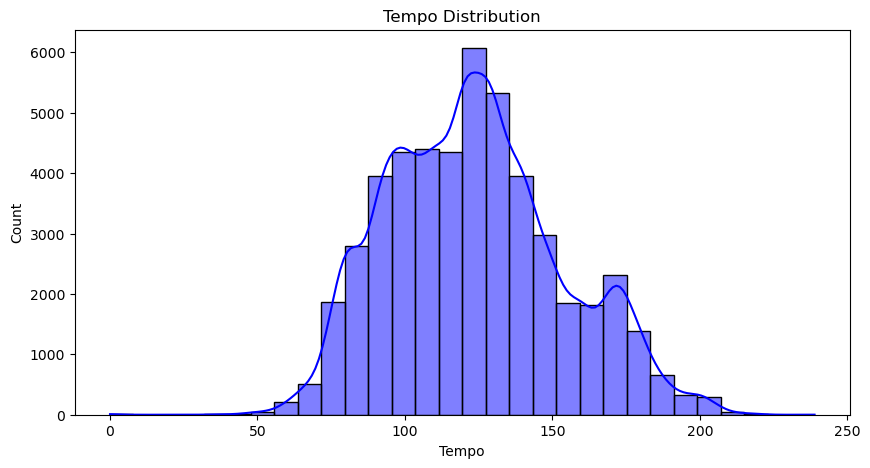

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#check the tempo distribution
plt.figure(figsize=(10,5))
sns.histplot(df_selected['tempo'],bins=30,color="blue", kde=True)
plt.title('Tempo Distribution')
plt.xlabel('Tempo')
plt.ylabel('Count')
plt.show()

In [29]:
#identify outliers in tempo column

zero_tempo=df_selected[df_selected['tempo']==0]
print(len(zero_tempo))
print('Songs with zero tempo:', zero_tempo)

10
Songs with zero tempo:                  track_id                        name  \
838    TRCTFEM12903CE53CF                     Sunburn   
1624   TRXRUTR128F4296932                         Uno   
11345  TRDPDLO128F427FD0E              Feel Good Lost   
12081  TRQWYLY128F149F2AC                The Bluebell   
21348  TRWRQGH12903CD60DA            Song for Someone   
23621  TRFUMNQ128F933906A  240 Years Before Your Time   
26227  TRLNWTE128F14942B2                  [untitled]   
40029  TRCYKDU128F92F1856                       Xylem   
40473  TRQKNOS128F9310736         Local Boy Makes God   
42732  TRDZLJH128F428CB73         Cheerleader Corpses   

                        artist  \
838                       Muse   
1624                      Muse   
11345      Broken Social Scene   
12081             Patrick Wolf   
21348                       U2   
23621           The Black Keys   
26227      Broken Social Scene   
40029                 Aes Dana   
40473  Amusement Parks On Fire   
42732 

In [30]:
df_selected=df_selected[df_selected['tempo']>0]

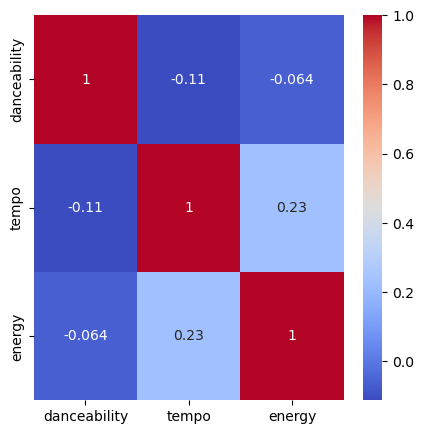

In [31]:
#correlation matrix  

correlation_matrix=df_selected[["danceability","tempo","energy"]].corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [32]:
# Ensure all tags are properly split into lists
alltags= df_selected["tags"].fillna("").apply(lambda x: [tag.strip() for tag in x.split(",")])
print(alltags.head(100))

alltags=alltags.explode().reset_index(drop=True)
print(alltags.head(100))
print(len(alltags))
print(alltags.unique())
print(len(alltags.unique()))

alltags=set(alltags)
print(alltags)
print(len(alltags))


0     [rock, alternative, indie, alternative_rock, i...
1     [rock, alternative, indie, pop, alternative_ro...
2     [rock, alternative, alternative_rock, 90s, gru...
3     [rock, alternative, indie, alternative_rock, i...
4     [rock, alternative, indie, alternative_rock, i...
                            ...                        
95    [rock, alternative, indie, alternative_rock, i...
96    [rock, alternative, indie, pop, alternative_ro...
97    [rock, alternative, indie, alternative_rock, i...
98                            [rock, classic_rock, 60s]
99    [rock, alternative, indie, alternative_rock, 9...
Name: tags, Length: 100, dtype: object
0                 rock
1          alternative
2                indie
3     alternative_rock
4           indie_rock
            ...       
95             british
96             hip_hop
97            trip_hop
98                rock
99         alternative
Name: tags, Length: 100, dtype: object
185276
['rock' 'alternative' 'indie' 'alternative_roc

In [34]:
#convert each tags row into a list of tags
df_selected['tags']=df_selected['tags'].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
print(df_selected['tags'].head(100))
#print(type(df_selected['tags'][0]))

0     [rock, alternative, indie, alternative_rock, i...
1     [rock, alternative, indie, pop, alternative_ro...
2     [rock, alternative, alternative_rock, 90s, gru...
3     [rock, alternative, indie, alternative_rock, i...
4     [rock, alternative, indie, alternative_rock, i...
                            ...                        
95    [rock, alternative, indie, alternative_rock, i...
96    [rock, alternative, indie, pop, alternative_ro...
97    [rock, alternative, indie, alternative_rock, i...
98                            [rock, classic_rock, 60s]
99    [rock, alternative, indie, alternative_rock, 9...
Name: tags, Length: 100, dtype: object


In [35]:
def jaccard_similarity(list1, list2):
    #convert lists to sets to calculate intersection and union
    list1=set(list1)
    list2=set(list2)
    intersection = len(list1 & list2)
    union = len(list1 | list2)
    return float(intersection) / union if union != 0 else 0 #avoid division by zero

In [36]:
#select a song
#selected_song=df_selected.iloc[0]
#print(selected_song)

#df_selected=df_selected.iloc[1:]

#compute jaccard similarity with apply() method
#df_selected['similarity'] = df_selected['tags'].apply(lambda tags: jaccard_similarity(selected_song['tags'], tags))

#sort songs by similarity
#df_selected_sorted=df_selected.sort_values(by='similarity', ascending=False, inplace=True)




In [37]:
#print top 10 similar songs
#print(df_selected.head(10))

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

#normalize tempo 
df_selected['tempo_scaled']=scaler.fit_transform(df_selected[['tempo']])

In [39]:
#print(df_selected.head(50))

In [40]:
#compute euclidean distance between selected song and all other songs for different features

def euclidean_distance(row, song, features):
    """
    Compute Euclidean distance between two songs for given features.
    
    Parameters:
    - row: Pandas Series (a song from the dataset)
    - song: Pandas Series (selected song)
    - features: List of feature names to compare
    
    Returns:
    - Euclidean distance value
    """
    return np.linalg.norm(row[features] - song[features])
    
    

In [41]:
#compute similarity between selected song and all other songs

def compute_similarity(selected_song, all_songs, features):
    """
    Compute similarity (1 / (1 + Euclidean distance)) for all songs.
    
    Parameters:
    - selected_song: Pandas Series (selected song)
    - all_songs: Pandas DataFrame (other songs in the dataset)
    - features: List of feature names to use in the calculation
    
    Returns:
    - DataFrame with track_id, name, and similarity score
    """
    # Create a copy to avoid modifying a slice
    all_songs = all_songs.copy()
    
    #convert to numpy arrays for faster computation
    
    selected_features = np.array(selected_song[features],  dtype=np.float64).reshape(1, -1)
    all_features = np.array(all_songs[features], dtype=np.float64)
    
    distances=np.linalg.norm(all_features-selected_features, axis=1)
    
    all_songs['similarity_features'] = 1 / (1 + distances)
    
    #return the similarity score as series not a dataframe
    return pd.Series(data=all_songs['similarity_features'].values, index=all_songs.index)
    

In [42]:
#test the function
#selected_song = df_selected.iloc[0]
#all_songs = df_selected.iloc[1:]
#features = ['danceability', 'energy', 'tempo_scaled']
#similar_songs = compute_similarity(selected_song, all_songs, features)
#print(similar_songs.head(60))

In [45]:
#combine similarity scores from tags and features

def combine_similarity(selected_song, all_songs, features, tags_weight):
    """
    Combine similarity scores from tags and features.
    
    Parameters:
    - selected_song: Pandas Series (selected song)
    - all_songs: Pandas DataFrame (other songs in the dataset)
    - features: List of feature names to use in the calculation
    - tags_weight: Weight to assign to tags similarity
    
    Returns:
    - DataFrame with track_id, name, and combined similarity score
    """
    
    all_songs = all_songs.copy()
    
    # Compute similarity based on features
    all_songs["similarity_features"] = compute_similarity(selected_song, all_songs, features)
    
    # Compute similarity based on tags
    all_songs["similarity_tags"] = all_songs['tags'].apply(lambda tags: jaccard_similarity(selected_song['tags'], tags))
    
    # Combine similarity scores
    all_songs['final_similarity'] = (1 - tags_weight) * all_songs['similarity_features'] + tags_weight * all_songs['similarity_tags']
    
    return all_songs.sort_values(by='final_similarity', ascending=False)

In [48]:
# Select a song
selected_song = df_selected.iloc[0]
all_songs = df_selected.iloc[1:]

# Define features for numeric similarity
features = ["danceability", "energy", "tempo_scaled"]

# Set weight parameter
tags_weight = 0.3

# Compute combined similarity
similar_songs = combine_similarity(selected_song, all_songs, features, tags_weight)
print(similar_songs.head(60))

                 track_id                                               name  \
1812   TRDLFGU128F42BC33B                                         McFearless   
322    TRILDZF128F4281CBB                                              12:51   
367    TRGRGQX128F9313DF4                                             Notion   
1958   TRXBHSU128F42BC33E                                    Black Thumbnail   
452    TRYAWVI128F42A01AE                                              Crawl   
1620   TRKTQRV128F427B8CB                               Salute Your Solution   
2701   TRRFWZI128F9318867                                      Unconditional   
568    TROIODT128F92C9D13                                                 17   
788    TRUDXPU128F4278B5C                                   Change Your Mind   
5424   TRILQFS128F4246627                                            Florida   
773    TRIOTVC128F14A8A10                                Take It or Leave It   
41880  TRFJXXL12903CBA458               

In [49]:
print(selected_song)

track_id                                       TRIOREW128F424EAF0
name                                               Mr. Brightside
artist                                                The Killers
tags            [rock, alternative, indie, alternative_rock, i...
danceability                                                0.355
energy                                                      0.918
tempo                                                     148.114
tempo_scaled                                              0.55685
Name: 0, dtype: object


In [50]:
#recommend the next song 

def recommend_next_song(selected_song, all_songs, features, tags_weight):
    """
    Recommend the next song based on the selected song.
    
    Parameters:
    - selected_song: Pandas Series (selected song)
    - all_songs: Pandas DataFrame (other songs in the dataset)
    - features: List of feature names to use in the calculation
    - tags_weight: Weight to assign to tags similarity
    
    Returns:
    - Pandas Series with the recommended song
    """
    
    # Compute combined similarity
    similar_songs = combine_similarity(selected_song, all_songs, features, tags_weight)
    
    #remove the song from the same artist as the selected song
    filtered_songs = similar_songs[similar_songs['artist'] != selected_song['artist']]
    
    #if diverse song exists, select the top one
    if not filtered_songs.empty:
        recommended_song = filtered_songs.iloc[0]
        
    #if no diverse song exists, select the top song
    return similar_songs.iloc[0] if not similar_songs.empty else None

In [51]:
# Test the function
selected_song = df_selected.iloc[0]
all_songs = df_selected.iloc[1:]
features = ["danceability", "energy", "tempo_scaled"]
tags_weight = 0.3
recommended_song = recommend_next_song(selected_song, all_songs, features, tags_weight)
print(recommended_song)

track_id                                              TRDLFGU128F42BC33B
name                                                          McFearless
artist                                                     Kings of Leon
tags                   [rock, alternative, indie, alternative_rock, i...
danceability                                                       0.362
energy                                                             0.931
tempo                                                            147.358
tempo_scaled                                                     0.55316
similarity_features                                             0.985009
similarity_tags                                                      1.0
final_similarity                                                0.989506
Name: 1812, dtype: object
